In [17]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential 
from tensorflow.keras.layers import Dense


In [3]:
df = pd.read_csv('Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
df.drop(columns = ['RowNumber','CustomerId','Surname'],inplace=True)

In [5]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse=False, drop='first')  
encoded_columns = encoder.fit_transform(df[['Geography','Gender']])

feature_names = encoder.get_feature_names_out(['Geography', 'Gender'])
encoded_df = pd.DataFrame(encoded_columns, columns=feature_names)

df = pd.concat([df, encoded_df], axis=1)

# Drop the original categorical columns
df.drop(['Geography', 'Gender'], axis=1, inplace=True)
df.head()


c:\Python\Lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0.0,0.0,0.0
1,608,41,1,83807.86,1,0,1,112542.58,0,0.0,1.0,0.0
2,502,42,8,159660.80,3,1,0,113931.57,1,0.0,0.0,0.0
3,699,39,1,0.00,2,0,0,93826.63,0,0.0,0.0,0.0
4,850,43,2,125510.82,1,1,1,79084.10,0,0.0,1.0,0.0


In [6]:
X = df.drop(columns = ["Exited"])
y = df["Exited"]
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(8000, 11)
(2000, 11)
(8000,)
(2000,)


In [7]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_trf = scaler.fit_transform(X_train)
X_test_trf = scaler.transform(X_test)

In [10]:
model = Sequential()
model.add(Dense(11, activation = "sigmoid", input_dim = 11))
model.add(Dense(11, activation = "sigmoid"))
model.add(Dense(1, activation = "sigmoid"))
model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 11)                132       
                                                                 
 dense_5 (Dense)             (None, 11)                132       
                                                                 
 dense_6 (Dense)             (None, 1)                 12        
                                                                 
Total params: 276 (1.08 KB)
Trainable params: 276 (1.08 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [11]:
model.compile(optimizer="Adam", loss="binary_crossentropy", metrics = ["accuracy"])
history = model.fit(X_train,y_train,batch_size=50,epochs=50,verbose=1,validation_split=0.2)


Epoch 1/50


128/128 [==============================] - 2s 5ms/step - loss: 0.9359 - accuracy: 0.2716 - val_loss: 0.6608 - val_accuracy: 0.7056
Epoch 2/50
128/128 [==============================] - 0s 3ms/step - loss: 0.5774 - accuracy: 0.7758 - val_loss: 0.5251 - val_accuracy: 0.7969
Epoch 3/50
128/128 [==============================] - 0s 3ms/step - loss: 0.5149 - accuracy: 0.7958 - val_loss: 0.5021 - val_accuracy: 0.7969
Epoch 4/50
128/128 [==============================] - 0s 3ms/step - loss: 0.5043 - accuracy: 0.7958 - val_loss: 0.4979 - val_accuracy: 0.7969
Epoch 5/50
128/128 [==============================] - 0s 3ms/step - loss: 0.5025 - accuracy: 0.7958 - val_loss: 0.4970 - val_accuracy: 0.7969
Epoch 6/50
128/128 [==============================] - 1s 4ms/step - loss: 0.5021 - accuracy: 0.7958 - val_loss: 0.4965 - val_accuracy: 0.7969
Epoch 7/50
128/128 [==============================] - 1s 5ms/step - loss: 0.5020 - accuracy: 0.7958 - val_loss: 0.4961 - val_accuracy: 0.7969
Epo

In [14]:
y_pred = model.predict(X_test)
y_pred = y_pred.argmax(axis=-1)
y_pred

63/63 [==============================] - 0s 2ms/step


array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [15]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.7975

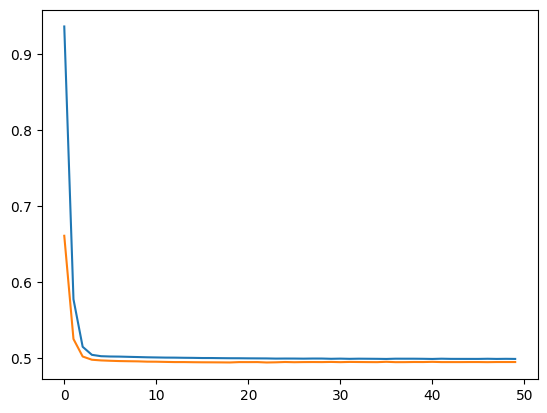

In [18]:


plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

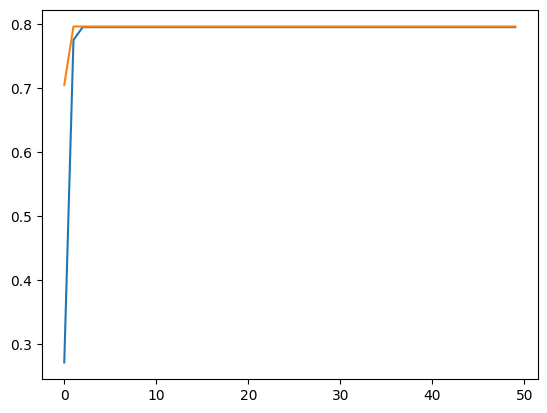

In [19]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])